In [1]:
import geopandas as gpd

import pandas as pd
import altair as alt

In [2]:
# simplyfied shapes (QGIS: v.generalize: douglas 1000m, dissovle by RS)
simp_shapes = gpd.read_file(r"input\kreise\vg2500_krs_simp.shp")
simp_shapes.head()

RS                                           geometry
0  01001  POLYGON ((4280971.103 3516528.992, 4279652.299...
1  01002  POLYGON ((4333012.016 3460725.628, 4329071.681...
2  01003  POLYGON ((4363220.756 3406959.238, 4359703.524...
3  01004  POLYGON ((4317351.533 3434974.151, 4315969.903...
4  01051  MULTIPOLYGON (((4256690.104 3419568.353, 42564...

In [3]:
data_shapes = gpd.read_file(r"input\kreise\vg2500_krs.shp", encoding='utf8')
#data_shapes=data_shapes[data_shapes.OBA!='AX_Gemeinde']
data_shapes.head()

ADE     RS          RS_0           GEN  \
0    4  01001  010010000000     Flensburg   
1    4  01002  010020000000          Kiel   
2    4  01003  010030000000        Lübeck   
3    4  01004  010040000000    Neumünster   
4    4  01051  010510000000  Dithmarschen   

                                            geometry  
0  POLYGON ((531470.957 6075201.090, 532435.433 6...  
1  POLYGON ((577310.280 6027466.911, 576863.752 6...  
2  POLYGON ((624204.438 5980391.723, 624886.676 5...  
3  POLYGON ((567602.493 5998385.945, 566865.243 5...  
4  MULTIPOLYGON (((479551.742 5990180.683, 479871...

In [4]:
data_shapes=pd.merge(simp_shapes,data_shapes[['GEN', 'RS']], on='RS')
data_shapes.head()

RS                                           geometry           GEN
0  01001  POLYGON ((4280971.103 3516528.992, 4279652.299...     Flensburg
1  01002  POLYGON ((4333012.016 3460725.628, 4329071.681...          Kiel
2  01003  POLYGON ((4363220.756 3406959.238, 4359703.524...        Lübeck
3  01004  POLYGON ((4317351.533 3434974.151, 4315969.903...    Neumünster
4  01051  MULTIPOLYGON (((4256690.104 3419568.353, 42564...  Dithmarschen

In [5]:
len(data_shapes)

401

In [6]:
inkar_data=pd.read_csv(r"input\Tabelle Abfrage_vicher.csv", sep=';', decimal=",", dtype={'Kennziffer': 'str'})[1:]
inkar_data.head()

Kennziffer        Raumeinheit      Aggregat  \
1      01001   Flensburg, Stadt  krsfr. Stadt   
2      01002        Kiel, Stadt  krsfr. Stadt   
3      01003      Lübeck, Stadt  krsfr. Stadt   
4      01004  Neumünster, Stadt  krsfr. Stadt   
5      01051       Dithmarschen     Landkreis   

  Nahversorgung Haltestellen des ÖV Durchschnittsdistanz  \
1                                                180       
2                                                193       
3                                                276       
4                                                187       
5                                                576       

   Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius Pkw-Dichte  \
1                                                100                   478   
2                                                100                   436   
3                                                 99                   444   
4                                                100                   514   
5                                                 87                   583   

  Einwohnerdichte Haushaltseinkommen Medianeinkommen  Auspendler  
1           1.560              1.527           2.986        34.2  
2           2.090              1.564           3.304        30.3  
3           1.010              1.630           3.036        31.3  
4           1.108              1.572           2.842        38.6  
5              93              1.793           2.914        73.5

In [7]:
inkar_data

Kennziffer           Raumeinheit      Aggregat  \
1        01001      Flensburg, Stadt  krsfr. Stadt   
2        01002           Kiel, Stadt  krsfr. Stadt   
3        01003         Lübeck, Stadt  krsfr. Stadt   
4        01004     Neumünster, Stadt  krsfr. Stadt   
5        01051          Dithmarschen     Landkreis   
..         ...                   ...           ...   
397      16073   Saalfeld-Rudolstadt     Landkreis   
398      16074  Saale-Holzland-Kreis     Landkreis   
399      16075      Saale-Orla-Kreis     Landkreis   
400      16076                 Greiz     Landkreis   
401      16077      Altenburger Land     Landkreis   

    Nahversorgung Haltestellen des ÖV Durchschnittsdistanz  \
1                                                  180       
2                                                  193       
3                                                  276       
4                                                  187       
5                                                  576       
..                                                 ...       
397                                                556       
398                                                646       
399                                              1.128       
400                                                735       
401                                                594       

     Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius Pkw-Dichte  \
1                                                  100                   478   
2                                                  100                   436   
3                                                   99                   444   
4                                                  100                   514   
5                                                   87                   583   
..                                                 ...                   ...   
397                                                 86                   570   
398                                                 82                   586   
399                                                 69                   616   
400                                                 76                   605   
401                                                 83                   565   

    Einwohnerdichte Haushaltseinkommen Medianeinkommen  Auspendler  
1             1.560              1.527           2.986        34.2  
2             2.090              1.564           3.304        30.3  
3             1.010              1.630           3.036        31.3  
4             1.108              1.572           2.842        38.6  
5                93              1.793           2.914        73.5  
..              ...                ...             ...         ...  
397             104              1.620           2.466        68.3  
398             102              1.598           2.288        79.8  
399              71              1.590           2.253        70.0  
400             117              1.637           2.233        72.0  
401             159              1.575           2.218        71.7  

[401 rows x 10 columns]

In [8]:
len(inkar_data)

401

In [9]:
inkar_data.Medianeinkommen=inkar_data.Medianeinkommen.str.replace('.','').astype(int)
inkar_data.Einwohnerdichte=inkar_data.Einwohnerdichte.str.replace('.','').astype(int)
inkar_data['Pkw-Dichte']=inkar_data['Pkw-Dichte'].astype(str).str.replace('.','').astype(int)
inkar_data['Nahversorgung Haltestellen des ÖV Durchschnittsdistanz']=inkar_data['Nahversorgung Haltestellen des ÖV Durchschnittsdistanz'].astype(str).str.replace('.','').astype(int)
inkar_data['Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius']=inkar_data['Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius'].astype(str).str.replace('.','').astype(int)
inkar_data['Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius']=inkar_data['Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius'].astype(str).str.replace('.','').astype(int)

In [10]:
merge=pd.merge(data_shapes,inkar_data, left_on='RS', right_on='Kennziffer', how='left')


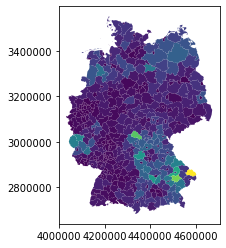

In [11]:
merge.plot(column='Nahversorgung Haltestellen des ÖV Durchschnittsdistanz')

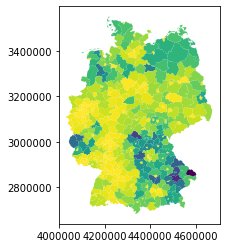

In [12]:
merge.plot(column='Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius')

In [13]:
merge['bland']=merge.RS.str[:2]
merge = merge.to_crs({'init': 'epsg:4326'})


C:\Users\Simon\Anaconda3\envs\geo_julab\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [14]:
merge.head()

RS                                           geometry           GEN  \
0  01001  POLYGON ((9.37851 54.75303, 9.35760 54.78028, ...     Flensburg   
1  01002  POLYGON ((10.18425 54.25299, 10.12382 54.25611...          Kiel   
2  01003  POLYGON ((10.64021 53.76830, 10.58718 53.79018...        Lübeck   
3  01004  POLYGON ((9.94434 54.02171, 9.92314 54.09434, ...    Neumünster   
4  01051  MULTIPOLYGON (((9.02226 53.87938, 9.01848 53.8...  Dithmarschen   

  Kennziffer        Raumeinheit      Aggregat  \
0      01001   Flensburg, Stadt  krsfr. Stadt   
1      01002        Kiel, Stadt  krsfr. Stadt   
2      01003      Lübeck, Stadt  krsfr. Stadt   
3      01004  Neumünster, Stadt  krsfr. Stadt   
4      01051       Dithmarschen     Landkreis   

   Nahversorgung Haltestellen des ÖV Durchschnittsdistanz  \
0                                                180        
1                                                193        
2                                                276        
3                                                187        
4                                                576        

   Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius  Pkw-Dichte  \
0                                                100                    478   
1                                                100                    436   
2                                                 99                    444   
3                                                100                    514   
4                                                 87                    583   

   Einwohnerdichte Haushaltseinkommen  Medianeinkommen  Auspendler bland  
0             1560              1.527             2986        34.2    01  
1             2090              1.564             3304        30.3    01  
2             1010              1.630             3036        31.3    01  
3             1108              1.572             2842        38.6    01  
4               93              1.793             2914        73.5    01

In [15]:

#source=df[:500].copy()
source=merge


###################################
#### PREP ###



brush = alt.selection(type='interval')
opacity_map = alt.condition(brush, alt.value(1), alt.value(0.25))

opacity_chart = alt.condition(brush, alt.value(0.9), alt.value(0.2))

###################################
#### MAP ###

base = alt.Chart(source).mark_geoshape(
    stroke='white',
    strokeWidth=0.5
).encode(
    opacity=opacity_map,
    color =  alt.Color('Pkw-Dichte:Q',
                        legend=alt.Legend(title="Pkw-Dichte",orient='none',legendY=480,legendX=-70),
                       scale=alt.Scale(scheme='blues')),#  format='.1%'),
    tooltip=[
            alt.Tooltip('GEN', title='Zulassungsbezirk'),
            alt.Tooltip('RS', title='RS'),
            alt.Tooltip('Pkw-Dichte', title='Zulassungssbezirk')
        ]
).properties(
    height=700,
    width=500
)

####################################
##### CHARTS ###
#
##### COL1 ###
#
#chrt1=alt.Chart(source).transform_fold(
#    columns,
#    as_=['column', 'value']
#).transform_filter(
#    sel
#).mark_circle(size=60, opacity=0.6).encode(
#    #x='bland:O',
#    x=alt.Y('bland:O', 
#            axis=alt.Axis(title='Bundesland')),
#    y=alt.Y('value:Q', 
#            axis=alt.Axis(format='%',title='Anteil')),
#    opacity=opacity_chart,
#    color=alt.condition(brush,
#                    alt.Color('value:Q'),
#                    alt.value('lightgray')),
#    tooltip=['NAME:O','RS','value:Q']
#).add_selection(
#    sel
#).add_selection(
#    brush
#).properties(
#    height=300,
#    width=300
#)
#
#chrt1b=alt.Chart(source).transform_fold(
#    columns,
#    as_=['column', 'value']
#).transform_filter(
#    sel
#).mark_boxplot(opacity=0.7).encode(
#    x='bland:O',
#      y=alt.Y('value:Q', title='')
#).properties(
#    height=300,
#    width=300
#)
#
#
#chrt2=alt.Chart(source).transform_fold(
#    columns,
#    as_=['column', 'value']
#).transform_filter(
#    sel
#).mark_circle(size=60).encode(
#    #x='_mean:Q',
#    x=alt.X('Einwohnerdichte:Q', title='Einwohnerdichte [E/qm]',scale=alt.Scale(type='log')),    #opacity=opacity_map,
#    y=alt.Y('value:Q', 
#            axis=alt.Axis(format='%',title='Anteil')),
#    opacity=opacity_chart,
#    color=alt.condition(brush,
#                    alt.Color('value:Q'),
#                    alt.value('lightgray')),
#    tooltip=['NAME:O','RS','value:Q']
#).add_selection(
#    sel
#).add_selection(
#    brush
#).properties(
#    height=300,
#    width=300
#)
#
###################################
#### COL2 ###

chrt3=alt.Chart(source).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('Medianeinkommen:Q', title='Medianeinkommen [pro Monat]',scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=300,
    width=300
)
#
#
#chrt4=alt.Chart(source).transform_fold(
#    columns,
#    as_=['column', 'value']
#).transform_filter(
#    sel
#).mark_circle(size=60).encode(
#    x=alt.X('Ländlichkeit:Q', title='Ländlichkeit [% Einwohner in geringer Dichte]'),    #opacity=opacity_map,
#    y=alt.Y('value:Q', 
#            axis=alt.Axis(format='%',title='Anteil')),
#    opacity=opacity_chart,
#    color=alt.condition(brush,
#                    alt.Color('value:Q'),
#                    alt.value('lightgray')),
#    tooltip=['NAME:O','RS','value:Q']
#).add_selection(
#    sel
#).add_selection(
#    brush
#).properties(
#    height=300,
#    width=300
#)
#
####################################
##### COL3 ###
#
#
#chrt5=alt.Chart(source).transform_fold(
#    columns,
#    as_=['column', 'value']
#).transform_filter(
#    sel
#).mark_circle(size=60).encode(
#    x=alt.X('Pkw-Dichte:Q', title='Pkw-Dichte'), 
#    y=alt.Y('value:Q', 
#            axis=alt.Axis(format='%',title='Anteil')),
#    opacity=opacity_chart,
#    color=alt.condition(brush,
#                    alt.Color('value:Q'),
#                    alt.value('lightgray')),
#    tooltip=['NAME:O','RS','value:Q']
#).add_selection(
#    sel
#).add_selection(
#    brush
#).properties(
#    height=300,
#    width=300
#)
#
#chrt6=alt.Chart(source).transform_fold(
#    columns,
#    as_=['column', 'value']
#).transform_filter(
#    sel
#).mark_circle(size=60).encode(
#    x=alt.X('Auspendler:Q', title='Auspendler'),    
#    y=alt.Y('value:Q', 
#            axis=alt.Axis(format='%',title='Anteil')),
#    opacity=opacity_chart,
#    color=alt.condition(brush,
#                    alt.Color('value:Q'),
#                    alt.value('lightgray')),
#    tooltip=['NAME:O','RS','value:Q']
#).add_selection(
#    sel
#).add_selection(
#    brush
#).properties(
#    height=300,
#    width=300
#)
#

chart = base | (chrt3)#| ((chrt1b+chrt1) & chrt2) |chrt3 & chrt4 |chrt5 & chrt6

##############################################################
# adding Titel and Subtitle
title = alt.Chart(
    {"values": [{"text": "Kraftstoffarten von PKW je Zulassungsbezirk"}]}
).mark_text(size=20, align='left').encode(  #,anchor='start' , align='left'
    text="text:N",
    x=alt.value(0)
)

subtitle = alt.Chart(
    {"values": [{"text": 'Quelle: KBA, INKAR'}]}
).mark_text(size=11, align='left').encode(
    text="text:N",
    x=alt.value(0)
)

  
fullchart_title= alt.vconcat(
    title,
    subtitle,#
    chart
).configure_view(
    stroke=None
).configure_concat(
    spacing=15
)

#fullchart_title.save('full_chart2.html')

In [16]:
chart

alt.HConcatChart(...)

In [17]:
## adding kba data

In [18]:
source.head()

RS                                           geometry           GEN  \
0  01001  POLYGON ((9.37851 54.75303, 9.35760 54.78028, ...     Flensburg   
1  01002  POLYGON ((10.18425 54.25299, 10.12382 54.25611...          Kiel   
2  01003  POLYGON ((10.64021 53.76830, 10.58718 53.79018...        Lübeck   
3  01004  POLYGON ((9.94434 54.02171, 9.92314 54.09434, ...    Neumünster   
4  01051  MULTIPOLYGON (((9.02226 53.87938, 9.01848 53.8...  Dithmarschen   

  Kennziffer        Raumeinheit      Aggregat  \
0      01001   Flensburg, Stadt  krsfr. Stadt   
1      01002        Kiel, Stadt  krsfr. Stadt   
2      01003      Lübeck, Stadt  krsfr. Stadt   
3      01004  Neumünster, Stadt  krsfr. Stadt   
4      01051       Dithmarschen     Landkreis   

   Nahversorgung Haltestellen des ÖV Durchschnittsdistanz  \
0                                                180        
1                                                193        
2                                                276        
3                                                187        
4                                                576        

   Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius  Pkw-Dichte  \
0                                                100                    478   
1                                                100                    436   
2                                                 99                    444   
3                                                100                    514   
4                                                 87                    583   

   Einwohnerdichte Haushaltseinkommen  Medianeinkommen  Auspendler bland  
0             1560              1.527             2986        34.2    01  
1             2090              1.564             3304        30.3    01  
2             1010              1.630             3036        31.3    01  
3             1108              1.572             2842        38.6    01  
4               93              1.793             2914        73.5    01

In [19]:
columns =['Pkw-Dichte','Medianeinkommen']
select_box = alt.binding_select(options=columns,  name='Indikator auswählen:  ')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'Pkw-Dichte'}, 
                           #clear=False,
                           on="click[event.shiftKey&!event.shiftKey]")

#base = alt.Chart(source).transform_fold(
#    columns,
#    as_=['column', 'value']
#).transform_filter(
#    sel
#).mark_geoshape(
#    stroke='white',
#    strokeWidth=0.5
#).encode(
#    #opacity=opacity_map,
#    color =  alt.Color('value:Q',
#                        legend=alt.Legend(title="Pkw-Dichte",orient='none',legendY=480,legendX=-70),
#                       scale=alt.Scale(scheme='blues')),#  format='.1%'),
#    tooltip=[
#            alt.Tooltip('GEN', title='Zulassungsbezirk'),
#            alt.Tooltip('RS', title='RS'),
#            alt.Tooltip('value', title='Zulassungsbdezirk')
#        ]
#).add_selection(
#        sel
#    ).properties(
#    height=700,
#    width=500
#)
base = alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_geoshape(
    stroke='white',
    strokeWidth=0.5
).encode(
    opacity=opacity_map,
    color =  alt.Color('value:Q',
                        legend=alt.Legend(title="PKW-Dichte",orient='none',legendY=550,legendX=-50),
                       scale=alt.Scale(scheme='blues')),#  format='.1%'),
    tooltip=[
            alt.Tooltip('GEN', title='Zulassungsbezirk'),
            alt.Tooltip('RS', title='RS'),
            alt.Tooltip('Pkw-Dichte')
        ],
).add_selection(
    sel
).properties(
    height=700,
    width=500
)
#chrt3=alt.Chart(source).transform_fold(
#    columns,
#    as_=['column', 'value']
#).transform_filter(
#    sel
#).mark_circle(size=60).encode(
#    #x='_mean:Q',
#    x=alt.X('Medianeinkommen:Q', title='Medianeinkommen [pro Monat]',scale=alt.Scale(type='log')),    #opacity=opacity_map,
#    y=alt.Y('value:Q', 
#            axis=alt.Axis(title='Anteil')),
#    opacity=opacity_chart,
#    color=alt.condition(brush,
#                    alt.Color('Pkw-Dichte:Q'),
#                    alt.value('lightgray')),
#    tooltip=['GEN:O','RS','value:Q']
#).add_selection(
#    brush
#).properties(
#    height=300,
#    width=300
#)

chrt3=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('Medianeinkommen:Q', title='Medianeinkommen [pro Monat]',scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('value:Q', 
            axis=alt.Axis(title='Anteil')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('value:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','value:Q']
).add_selection(
    sel
).add_selection(
    brush
).properties(
    height=300,
    width=300
)

chrt4=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('Pkw-Dichte:Q', title='Pkw-Dichte',scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('value:Q', 
            axis=alt.Axis(title='Anteil')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('value:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','value:Q']
).add_selection(
    sel
).add_selection(
    brush
).properties(
    height=300,
    width=300
)

base | (chrt3&chrt4)

alt.HConcatChart(...)

In [20]:
source.columns

Index(['RS', 'geometry', 'GEN', 'Kennziffer', 'Raumeinheit', 'Aggregat',
       'Nahversorgung Haltestellen des ÖV Durchschnittsdistanz',
       'Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius',
       'Pkw-Dichte', 'Einwohnerdichte', 'Haushaltseinkommen',
       'Medianeinkommen', 'Auspendler', 'bland'],
      dtype='object')

In [21]:
source.oev_distanz

AttributeError: 'GeoDataFrame' object has no attribute 'oev_distanz'

In [22]:
source.columns

Index(['RS', 'geometry', 'GEN', 'Kennziffer', 'Raumeinheit', 'Aggregat',
       'Nahversorgung Haltestellen des ÖV Durchschnittsdistanz',
       'Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius',
       'Pkw-Dichte', 'Einwohnerdichte', 'Haushaltseinkommen',
       'Medianeinkommen', 'Auspendler', 'bland'],
      dtype='object')

In [94]:

#source=df[:500].copy()
source=merge
source=source.rename(columns={
    'Nahversorgung Haltestellen des ÖV Durchschnittsdistanz': 'oev_distanz',
    'Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius': 'oev_1km',
})

###################################
#### PREP ###



brush = alt.selection(type='interval')
opacity_map = alt.condition(brush, alt.value(0.8), alt.value(0.25))

opacity_chart = alt.condition(brush, alt.value(0.9), alt.value(0.2))

###################################
#### MAP ###

base = alt.Chart(source).mark_geoshape(
    stroke='white',
    strokeWidth=0.5,
    opacity=0.8
).encode(
    opacity=opacity_map,
    color =  alt.Color('Pkw-Dichte:Q',
                        legend=alt.Legend(title="Pkw-Dichte",orient='none',legendY=480,legendX=-70),
                       scale=alt.Scale(domain=[350,850],
                                       #scheme='blues',
                                      range=['darkgreen','green','green','green', 'yellow', 'red', 'red', 'red', 'darkred'])
                    ),#  format='.1%'),
    tooltip=[
            alt.Tooltip('GEN', title='Zulassungsbezirk'),
            alt.Tooltip('RS', title='RS'),
            alt.Tooltip('Pkw-Dichte', title='Zulassungssbezirk')
        ]
).properties(
    height=700,
    width=500
)

###################################
#### COL1 ###
#'Nahversorgung Haltestellen des ÖV Durchschnittsdistanz',
#       'Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius',
#       'Pkw-Dichte', 'Einwohnerdichte', 'Haushaltseinkommen',
#       'Medianeinkommen', 'Auspendler'

chrt1=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('Medianeinkommen:Q', title='Medianeinkommen [pro Monat]'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)
#
chrt2=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('Einwohnerdichte:Q', title='Einwohnerdichte',scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

chrt3=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('oev_distanz:Q', title='oev_distanz'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)


####################
chrt4=alt.Chart(source).mark_circle(size=60,opacity=0.6).encode(
    #x='_mean:Q',
    x=alt.X('Haushaltseinkommen:Q', title='Haushaltseinkommen'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

chrt5=alt.Chart(source).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('Auspendler:Q', title='Auspendler'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

chrt6=alt.Chart(source).mark_circle(size=60,opacity=0.6).encode(
    #x='_mean:Q',
    x=alt.X('oev_1km:Q', title='oev_1km'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

chrt7=alt.Chart(source).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('bland:N', title='Bundesland'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)



#chart = base | (chrt1&chrt2&chrt3)| (chrt4&(chrt5+chrt5_reg)&chrt6) # ((chrt1b+chrt1) & chrt2) |chrt3 & chrt4 |chrt5 & chrt6

chart = base | (chrt1&chrt2&chrt3)| (chrt4&chrt5&chrt6) | chrt7# ((chrt1b+chrt1) & chrt2) |chrt3 & chrt4 |chrt5 & chrt6

##############################################################
# adding Titel and Subtitle
title = alt.Chart(
    {"values": [{"text": "PKW-Dichte und Indikatoren"}]}
).mark_text(size=20, align='left').encode(  #,anchor='start' , align='left'
    text="text:N",
    x=alt.value(0)
)

quelle = alt.Chart(
    {"values": [{"text": 'Quelle: INKAR'}]}
).mark_text(size=11, align='left').encode(
    text="text:N",
    x=alt.value(0)
)

  
fullchart_title= alt.vconcat(
    title,
    chart,
    quelle
).configure_view(
    stroke=None
).configure_concat(
    spacing=15
)



In [95]:
fullchart_title

alt.VConcatChart(...)

In [85]:
fullchart_title.save('full_chart2_vicher.html')

# REGESSION

In [108]:

#source=df[:500].copy()
source=merge
source=source.rename(columns={
    'Nahversorgung Haltestellen des ÖV Durchschnittsdistanz': 'oev_distanz',
    'Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius': 'oev_1km',
})

###################################
#### PREP ###



brush = alt.selection(type='interval')
opacity_map = alt.condition(brush, alt.value(0.8), alt.value(0.25))

opacity_chart = alt.condition(brush, alt.value(0.9), alt.value(0.2))

###################################
#### MAP ###

base = alt.Chart(source).mark_geoshape(
    stroke='white',
    strokeWidth=0.5,
    opacity=0.8
).encode(
    opacity=opacity_map,
    color =  alt.Color('Pkw-Dichte:Q',
                        legend=alt.Legend(title="Pkw-Dichte",orient='none',legendY=480,legendX=-70),
                       scale=alt.Scale(domain=[350,850],
                                       #scheme='blues',
                                      range=['darkgreen','green','green','green', 'yellow', 'red', 'red', 'red', 'darkred'])
                    ),#  format='.1%'),
    tooltip=[
            alt.Tooltip('GEN', title='Zulassungsbezirk'),
            alt.Tooltip('RS', title='RS'),
            alt.Tooltip('Pkw-Dichte', title='Zulassungssbezirk')
        ]
).properties(
    height=700,
    width=500
)

###################################
#### COL1 ###
#'Nahversorgung Haltestellen des ÖV Durchschnittsdistanz',
#       'Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius',
#       'Pkw-Dichte', 'Einwohnerdichte', 'Haushaltseinkommen',
#       'Medianeinkommen', 'Auspendler'

chrt1=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('Medianeinkommen:Q', title='Medianeinkommen [pro Monat]'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)
#
chrt2=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('Einwohnerdichte:Q', title='Einwohnerdichte',scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

chrt3=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('oev_distanz:Q', title='oev_distanz'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)


####################
chrt4=alt.Chart(source).mark_circle(size=60,opacity=0.6).encode(
    #x='_mean:Q',
    x=alt.X('Haushaltseinkommen:Q', title='Haushaltseinkommen'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

chrt5=alt.Chart(source).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('Auspendler:Q', title='Auspendler'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

chrt6=alt.Chart(source).mark_circle(size=60,opacity=0.6).encode(
    #x='_mean:Q',
    x=alt.X('oev_1km:Q', title='oev_1km'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

#chrt7=alt.Chart(source).mark_circle(size=60).encode(
#    #x='_mean:Q',
#    x=alt.X('bland:N', title='Bundesland'),    #opacity=opacity_map,
#    y=alt.Y('Pkw-Dichte:Q', 
#            axis=alt.Axis(title='Pkw-Dichte')),
#    opacity=opacity_chart,
#    color=alt.condition(brush,
#                    alt.Color('Pkw-Dichte:Q'),
#                    alt.value('lightgray')),
#    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
#).add_selection(
#    brush
#).properties(
#    height=200,
#    width=200
#)

chrt7=alt.Chart(source).mark_boxplot().encode(
    #x='_mean:Q',
    x=alt.X('bland:N', title='Bundesland'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte'))
).add_selection(
    brush
).properties(
    height=200,
    width=200
)



## REGRESSION

chrt5_reg=alt.Chart(source).transform_filter(
        brush
    ).mark_circle().encode(
    x=alt.X('Auspendler:Q', title='Auspendler'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('Auspendler', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt5_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'Auspendler', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt5_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'Auspendler', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

####

chrt4_reg=alt.Chart(source).transform_filter(
        brush
    ).mark_circle().encode(
    x=alt.X('Haushaltseinkommen:Q', title='Haushaltseinkommen'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('Haushaltseinkommen', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt4_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'Haushaltseinkommen', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt4_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'Haushaltseinkommen', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

####

chrt6_reg=alt.Chart(source).transform_filter(
        brush
    ).mark_circle().encode(
    x=alt.X('oev_1km:Q', title='oev_1km'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('oev_1km', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt6_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'oev_1km', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt6_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'oev_1km', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

####

chrt2_reg=alt.Chart(source).transform_filter(
        brush
    ).mark_circle().encode(
    x=alt.X('Einwohnerdichte:Q', title='Einwohnerdichte'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('Einwohnerdichte', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt2_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'Einwohnerdichte', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt2_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'Einwohnerdichte', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

#chart = base | (chrt1&chrt2&chrt3)| (chrt4&(chrt5+chrt5_reg)&chrt6) # ((chrt1b+chrt1) & chrt2) |chrt3 & chrt4 |chrt5 & chrt6

chrt4_full= chrt4+chrt4_reg+chrt4_reg_text_rSquared+chrt4_reg_text_coef2
chrt5_full= chrt5+chrt5_reg+chrt5_reg_text_rSquared+chrt5_reg_text_coef2 
chrt6_full= chrt6+chrt6_reg+chrt6_reg_text_rSquared+chrt6_reg_text_coef2 
chrt2_full= chrt2+chrt2_reg+chrt2_reg_text_rSquared+chrt2_reg_text_coef2


chart = base | (chrt1&chrt2_full&chrt3)| (chrt4_full&chrt5_full&chrt6_full) | chrt7# ((chrt1b+chrt1) & chrt2) |chrt3 & chrt4 |chrt5 & chrt6

##############################################################
# adding Titel and Subtitle
title = alt.Chart(
    {"values": [{"text": "PKW-Dichte und Indikatoren"}]}
).mark_text(size=20, align='left').encode(  #,anchor='start' , align='left'
    text="text:N",
    x=alt.value(0)
)

quelle = alt.Chart(
    {"values": [{"text": 'Quelle: © BBSR Bonn 2019 (INKAR)'}]}
).mark_text(size=11, align='left').encode(
    text="text:N",
    x=alt.value(0)
)

  
fullchart_title= alt.vconcat(
    title,
    chart,
    quelle
).configure_view(
    stroke=None
).configure_concat(
    spacing=15
)



In [109]:
fullchart_title

alt.VConcatChart(...)

In [ ]:
# Bundeslaender

In [121]:
dict_bland= {
'1': 'Schleswig-Holstein',
'2': 'Hamburg',
'3': 'Niedersachsen',
'4': 'Bremen',
'5': 'Nordrhein-Westfalen',
'6': 'Hessen',
'7': 'Rheinland-Pfalz',
'8': 'Baden-Württemberg',
'9': 'Bayern',
'10': 'Saarland',
'11': 'Berlin',
'12': 'Brandenburg',
'13': 'Mecklenburg-Vorpommern',
'14': 'Sachsen',
'15': 'Sachsen-Anhalt',
'16': 'Thüringen'}

In [ ]:
#data_group_land['BLand'] = data_group_land.Land.apply(lambda x: dict_bland[str(x)])

In [297]:
source.head()

RS                                           geometry           GEN  \
0  01001  POLYGON ((9.37851 54.75303, 9.35760 54.78028, ...     Flensburg   
1  01002  POLYGON ((10.18425 54.25299, 10.12382 54.25611...          Kiel   
2  01003  POLYGON ((10.64021 53.76830, 10.58718 53.79018...        Lübeck   
3  01004  POLYGON ((9.94434 54.02171, 9.92314 54.09434, ...    Neumünster   
4  01051  MULTIPOLYGON (((9.02226 53.87938, 9.01848 53.8...  Dithmarschen   

  Kennziffer        Raumeinheit      Aggregat  oev_distanz  oev_1km  \
0      01001   Flensburg, Stadt  krsfr. Stadt          180      100   
1      01002        Kiel, Stadt  krsfr. Stadt          193      100   
2      01003      Lübeck, Stadt  krsfr. Stadt          276       99   
3      01004  Neumünster, Stadt  krsfr. Stadt          187      100   
4      01051       Dithmarschen     Landkreis          576       87   

   Pkw-Dichte  Einwohnerdichte Haushaltseinkommen  Medianeinkommen  \
0         478             1560              1.527             2986   
1         436             2090              1.564             3304   
2         444             1010              1.630             3036   
3         514             1108              1.572             2842   
4         583               93              1.793             2914   

   Auspendler bland               BLand  
0        34.2    01  Schleswig-Holstein  
1        30.3    01  Schleswig-Holstein  
2        31.3    01  Schleswig-Holstein  
3        38.6    01  Schleswig-Holstein  
4        73.5    01  Schleswig-Holstein

0      1527
1      1564
2      1630
3      1572
4      1793
       ... 
396    1620
397    1598
398    1590
399    1637
400    1575
Name: Haushaltseinkommen, Length: 401, dtype: int32

In [314]:

#source=df[:500].copy()
source=merge
source=source.rename(columns={
    'Nahversorgung Haltestellen des ÖV Durchschnittsdistanz': 'oev_distanz',
    'Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius': 'oev_1km',
})
source['BLand'] = source.bland.apply(lambda x: dict_bland[str(int(x))])

source['Haushaltseinkommen']=(source['Haushaltseinkommen'].astype(float)*1000).astype(int)

###################################
#### PREP ###

bland_selection = alt.selection_multi(fields=['bland'])#, init={'weekday': 'Monday'})


brush = alt.selection(type='interval')
opacity_map = alt.condition(brush, alt.value(0.8), alt.value(0.25))

opacity_chart = alt.condition(brush, alt.value(0.9), alt.value(0.2))

###################################
#### MAP ###

base = alt.Chart(source).mark_geoshape(
    stroke='white',
    strokeWidth=0.5,
    opacity=0.8
).encode(
    opacity=opacity_map,
    color =  alt.Color('Pkw-Dichte:Q',
                        legend=alt.Legend(title="Pkw-Dichte",orient='none',legendY=480,legendX=-70),
                       scale=alt.Scale(domain=[350,850],
                                       #scheme='blues',
                                      range=['darkgreen','green','green','green', 'yellow', 'red', 'red', 'red', 'darkred'])
                    ),#  format='.1%'),
    tooltip=[
            alt.Tooltip('GEN', title='Landkreis'),
            alt.Tooltip('Pkw-Dichte', title='Pkw-Dichte'),
            alt.Tooltip('Einwohnerdichte'),
            alt.Tooltip('Medianeinkommen')
        ]
).properties(
    height=700,
    width=500
).transform_filter(
    bland_selection
).add_selection(
    bland_selection
)



###################################
#### COL1 ###
#'Nahversorgung Haltestellen des ÖV Durchschnittsdistanz',
#       'Nahversorgung Haltestellen des ÖV Anteil der Bev. 1km Radius',
#       'Pkw-Dichte', 'Einwohnerdichte', 'Haushaltseinkommen',
#       'Medianeinkommen', 'Auspendler'

chrt1=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('Medianeinkommen:Q', title='Medianeinkommen [pro Monat]'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
).transform_filter(
    bland_selection
)
#
chrt2=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('Einwohnerdichte:Q', title='Einwohnerdichte',scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
).transform_filter(
    bland_selection
)

chrt3=alt.Chart(source).mark_circle(size=60,opacity=0.8).encode(
    #x='_mean:Q',
    x=alt.X('oev_distanz:Q', title=['Nahversorgung Haltestellen ','des ÖV Durchschnittsdistanz'],scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
).transform_filter(
    bland_selection
)


####################
chrt4=alt.Chart(source).mark_circle(size=60,opacity=0.6).encode(
    #x='_mean:Q',
    x=alt.X('Haushaltseinkommen:Q', title='Haushaltseinkommen'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
).transform_filter(
    bland_selection
)

chrt5=alt.Chart(source).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('Auspendler:Q', title='Auspendler'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
).transform_filter(
    bland_selection
)

chrt6=alt.Chart(source).mark_circle(size=60,opacity=0.6).encode(
    #x='_mean:Q',
    x=alt.X('oev_1km:Q', title=['Nahversorgung Haltestellen ','des ÖV Anteil der Bev. 1km Radius'],scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
).transform_filter(
    bland_selection
)

#chrt7=alt.Chart(source).mark_circle(size=60).encode(
#    #x='_mean:Q',
#    x=alt.X('bland:N', title='Bundesland'),    #opacity=opacity_map,
#    y=alt.Y('Pkw-Dichte:Q', 
#            axis=alt.Axis(title='Pkw-Dichte')),
#    opacity=opacity_chart,
#    color=alt.condition(brush,
#                    alt.Color('Pkw-Dichte:Q'),
#                    alt.value('lightgray')),
#    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
#).add_selection(
#    brush
#).properties(
#    height=200,
#    width=200
#)

chrt7=alt.Chart(source).mark_boxplot().encode(
    #x='_mean:Q',
    x=alt.X('bland:N', title='Bundesland'),    #opacity=opacity_map,
    y=alt.Y('Pkw-Dichte:Q', 
            axis=alt.Axis(title='Pkw-Dichte'))
).add_selection(
    brush
).properties(
    height=200,
    width=200
)



## REGRESSION

chrt5_reg=alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).mark_circle().encode(
    x=alt.X('Auspendler:Q', title='Auspendler'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('Auspendler', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt5_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'Auspendler', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt5_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'Auspendler', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

####

chrt4_reg=alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).mark_circle().encode(
    x=alt.X('Haushaltseinkommen:Q', title='Haushaltseinkommen'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('Haushaltseinkommen', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt4_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'Haushaltseinkommen', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt4_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'Haushaltseinkommen', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

####

chrt6_reg=alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).mark_circle().encode(
    x=alt.X('oev_1km:Q'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('oev_1km', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt6_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'oev_1km', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt6_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'oev_1km', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

####

chrt2_reg=alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).mark_circle().encode(
    x=alt.X('Einwohnerdichte:Q', title='Einwohnerdichte'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('Einwohnerdichte', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt2_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'Einwohnerdichte', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt2_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'Einwohnerdichte', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

####

chrt3_reg=alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).mark_circle().encode(
    x=alt.X('oev_distanz:Q'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('oev_distanz', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt3_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'oev_distanz', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt3_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'oev_distanz', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

####

chrt1_reg=alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).mark_circle().encode(
    x=alt.X('Medianeinkommen:Q'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('Medianeinkommen', 'Pkw-Dichte',method="linear").mark_line(color='gray')

chrt1_reg_text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'Medianeinkommen', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

chrt1_reg_text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_filter(
    bland_selection
).transform_regression(
    'Medianeinkommen', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')

##############

## interactive legend
legend = alt.Chart(source, title='Bundesland').mark_rect(stroke='1',strokeWidth=0.2).encode(
        y=alt.Y('bland:N', axis=alt.Axis(title='', orient='right')),#,title='Bundesländer'),#  sort=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]), , titleAnchor  ='start'
        color=alt.condition(bland_selection,
                    alt.value('gray'),
                    alt.value('lightgray')) , 
    
        tooltip=['BLand:N', 'count(BLand)'],#,'mean(cnt):Q']
        #tooltip=[
        #alt.Tooltip('count(Bundesland):Q', title='Messstation mit DTV'),
        #alt.Tooltip('bland_freq', title='gesamte Messstationen in Bundesland')
        #],
    
    ).add_selection(
    bland_selection
).properties(
        width=20,
    )



#chart = base | (chrt1&chrt2&chrt3)| (chrt4&(chrt5+chrt5_reg)&chrt6) # ((chrt1b+chrt1) & chrt2) |chrt3 & chrt4 |chrt5 & chrt6

chrt4_full= chrt4+chrt4_reg+chrt4_reg_text_rSquared+chrt4_reg_text_coef2
chrt5_full= chrt5+chrt5_reg+chrt5_reg_text_rSquared+chrt5_reg_text_coef2 
chrt6_full= chrt6+chrt6_reg+chrt6_reg_text_rSquared+chrt6_reg_text_coef2 
chrt2_full= chrt2+chrt2_reg+chrt2_reg_text_rSquared+chrt2_reg_text_coef2
chrt3_full= chrt3+chrt3_reg+chrt3_reg_text_rSquared+chrt3_reg_text_coef2
chrt1_full= chrt1+chrt1_reg+chrt1_reg_text_rSquared+chrt1_reg_text_coef2


chart = base| legend |(chrt1_full&chrt2_full&chrt3_full)| (chrt4_full&chrt5_full&chrt6_full) #chrt7# ((chrt1b+chrt1) & chrt2) |chrt3 & chrt4 |chrt5 & chrt6

##############################################################
# adding Titel and Subtitle
title = alt.Chart(
    {"values": [{"text": "Pkw-Dichte und mehr"}]}
).mark_text(size=20, align='left').encode(  #,anchor='start' , align='left'
    text="text:N",
    x=alt.value(0)
)

quelle = alt.Chart(
    {"values": [{"text": 'Quelle: © BBSR Bonn 2019 (INKAR)'}]}
).mark_text(size=11, align='left').encode(
    text="text:N",
    x=alt.value(0)
)

  
fullchart_title= alt.vconcat(
    title,
    chart,
    quelle
).configure_view(
    stroke=None
).configure_concat(
    spacing=15
)



In [315]:
fullchart_title

alt.VConcatChart(...)

In [316]:
fullchart_title.save('full_chart3_bundesland.html')

In [259]:
box=alt.Chart(source).mark_boxplot().encode(
    x=alt.X('bland:N', title='Bundesland'),
    y=alt.Y('Pkw-Dichte:Q')
)

In [260]:
bland_selection = alt.selection_multi(fields=['bland'])

map_ = alt.Chart(source).mark_geoshape(
).encode(
    tooltip=['Pkw-Dichte'],
    color='Pkw-Dichte'
).properties(
    height=700,
    width=500
).transform_filter(
    bland_selection
).add_selection(
    bland_selection
)

legend = alt.Chart(source).mark_rect(
).encode(
    y=alt.Y('bland:N', axis=alt.Axis(title='State', orient='right')),
    color=alt.condition(bland_selection,
                    alt.value('gray'),
                    alt.value('lightgray')),  
    tooltip=['bland:N'],
).add_selection(
    bland_selection
)


map_ | legend


alt.HConcatChart(...)

In [221]:
counties

UrlData({
  format: TopoDataFormat({
    feature: 'counties',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})

In [81]:
brush = alt.selection(type='interval')
opacity_map = alt.condition(brush, alt.value(0.8), alt.value(0.25))

opacity_chart = alt.condition(brush, alt.value(0.9), alt.value(0.2))


base5=alt.Chart(source).mark_circle(size=60).encode(

    x=alt.X('Auspendler:Q', title='Auspendler'),  
    y=alt.Y('Pkw-Dichte:Q'),

)

chrt5=alt.Chart(source).mark_circle(size=60).encode(
    x=alt.X('Auspendler:Q', title='Auspendler'),  
    y=alt.Y('Pkw-Dichte:Q'),
    #opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('Pkw-Dichte:Q'),
                    alt.value('lightgray')),
    tooltip=['GEN:O','RS','Pkw-Dichte:Q']
).add_selection(
    brush
).properties(
    height=200,
    width=200
)

chrt5_reg=alt.Chart(source).transform_filter(
        brush
    ).mark_circle().encode(
    x=alt.X('Auspendler:Q', title='Auspendler'),  
    y=alt.Y('Pkw-Dichte:Q'),
).transform_regression('Auspendler', 'Pkw-Dichte',method="linear").mark_line(color='gray') #,groupby=['bl']



#text=alt.Chart(source).mark_circle().encode(
#    x=alt.X('Auspendler:Q', title='Auspendler'),  
#    y=alt.Y('Pkw-Dichte:Q'),
#).transform_regression('Auspendler', 'Pkw-Dichte',method="poly",params=True).mark_text(color='black')
#

text_rSquared = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'Auspendler', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(137),  # pixels from left
    y=alt.value(10),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')#, format='.3f')
#).transform_calculate(label=f'format(datum.rSquared,".1f") + " inches"')
#)#.transform_calculate(label='" blaaaa "+ datum.rSquared')
).transform_calculate(label='"rSquare: "+ format(datum.rSquared,".2f")')

#text_coef = alt.Chart(source).transform_filter(
#        brush
#    ).transform_regression(
#    'Auspendler', 'Pkw-Dichte', params=True
#).mark_text(align='left',color='gray').encode(
#    x=alt.value(270),  # pixels from left
#    y=alt.value(50),  # pixels from top
#    #text='rSquared:Nformat'
#    text=alt.Text('label:O')
#).transform_calculate(label='"blaaaa: "+ format(datum.coef[0],".2f")')
##).transform_calculate(label="['Text on the first line', 'and text on the second line']")
#

text_coef2 = alt.Chart(source).transform_filter(
        brush
    ).transform_regression(
    'Auspendler', 'Pkw-Dichte', params=True
).mark_text(align='left',color='gray').encode(
    x=alt.value(150),  # pixels from left
    y=alt.value(25),  # pixels from top
    #text='rSquared:Nformat'
    text=alt.Text('label:O')
).transform_calculate(label='"slope: "+ format(datum.coef[1],".2f")')


# multiline example
#axis=alt.Axis(title=['Text on the first line', 'and text on the second line'])

#text = alt.Chart(source).mark_text(dx=-15, dy=3, color='black').encode(
#    x=alt.X('Auspendler:Q', stack='zero'),
#    y=alt.Y('Pkw-Dichte:N'),
#    #detail='site:N',
#    text=alt.Text('sum(yield):Q', format='.1f')
#)



chrt5  +chrt5_reg +text_rSquared  + text_coef2   #chrt5.transform_regression('Auspendler', 'Pkw-Dichte').mark_line()

alt.LayerChart(...)

In [29]:
str(text)

NameError: name 'text' is not defined

In [ ]:
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'label:N', alt.value(' '))
).transform_calculate(label='datum.y + " inches"')

In [249]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(42)
x = np.linspace(0, 10)
y = x - 5 + np.random.randn(len(x))

df = pd.DataFrame({'x': x, 'y': y})

chart = alt.Chart(df).mark_point().encode(
    x='x',
    y='y'
)

chart + chart.transform_regression('x', 'y').mark_line() + chart.transform_regression('x', 'y', params=True)

alt.LayerChart(...)

In [250]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(42)
x = np.linspace(0, 10)
y = x - 5 + np.random.randn(len(x))

df = pd.DataFrame({'x': x, 'y': y})

chart = alt.Chart(df).mark_point().encode(
    x='x',
    y='y'
)
line = chart.transform_regression('x', 'y').mark_line()

params = alt.Chart(df).transform_regression(
    'x', 'y', params=True
).mark_text(align='left').encode(
    x=alt.value(20),  # pixels from left
    y=alt.value(20),  # pixels from top
    text='rSquared:N'
)

chart + line + params

alt.LayerChart(...)

In [198]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])


In [201]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

In [202]:
r_sq

0.715875613747954

In [212]:
source.head()

RS                                           geometry           GEN  \
0  01001  POLYGON ((9.37851 54.75303, 9.35760 54.78028, ...     Flensburg   
1  01002  POLYGON ((10.18425 54.25299, 10.12382 54.25611...          Kiel   
2  01003  POLYGON ((10.64021 53.76830, 10.58718 53.79018...        Lübeck   
3  01004  POLYGON ((9.94434 54.02171, 9.92314 54.09434, ...    Neumünster   
4  01051  MULTIPOLYGON (((9.02226 53.87938, 9.01848 53.8...  Dithmarschen   

  Kennziffer        Raumeinheit      Aggregat  oev_distanz  oev_1km  \
0      01001   Flensburg, Stadt  krsfr. Stadt          180      100   
1      01002        Kiel, Stadt  krsfr. Stadt          193      100   
2      01003      Lübeck, Stadt  krsfr. Stadt          276       99   
3      01004  Neumünster, Stadt  krsfr. Stadt          187      100   
4      01051       Dithmarschen     Landkreis          576       87   

   Pkw-Dichte  Einwohnerdichte Haushaltseinkommen  Medianeinkommen  \
0         478             1560              1.527             2986   
1         436             2090              1.564             3304   
2         444             1010              1.630             3036   
3         514             1108              1.572             2842   
4         583               93              1.793             2914   

   Auspendler bland  
0        34.2    01  
1        30.3    01  
2        31.3    01  
3        38.6    01  
4        73.5    01

In [211]:
x=np.array(source.Auspendler).reshape((-1, 1))
y=np.array(source['Pkw-Dichte'])

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

r_sq

0.43131650468115146

In [221]:
source=source.sort_values('Auspendler')

x=np.array(source.Auspendler).reshape((-1, 1))
y=np.array(source['Pkw-Dichte'])

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

r_sq

0.43131650468115135

In [219]:
x=np.array(source.bland).reshape((-1, 1))
y=np.array(source['Pkw-Dichte'])

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

r_sq

0.006870039564246588

In [214]:
x=np.array(source.Einwohnerdichte).reshape((-1, 1))
y=np.array(source['Pkw-Dichte'])

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

r_sq

0.4127242797100906

In [210]:
r_sq

0.43131650468115146

In [197]:
import numpy as np
from sklearn.linear_model import LinearRegression


model = LinearRegression().fit(source.Auspendler, y)


NameError: name 'y' is not defined

In [6]:
kba_data= pd.read_excel(r"input\fz1_2019_xlsx.xlsx", sheet_name='Kfz_u_Kfz_Anh', skiprows=8, nrows=444)

kba_data= kba_data[['Statistische Kennziffer und Zulassungsbezirk',
       'PKW-Dichte\nje 1.000 \nEinwohner']].copy()

kba_data=kba_data.rename(columns={'Statistische Kennziffer und Zulassungsbezirk':'Zulassungsbezirk', 
                                  'PKW-Dichte\nje 1.000 \nEinwohner': 'PKW-Dichte'})
kba_data['RS']=kba_data.Zulassungsbezirk.str[:5]

kba_data=kba_data.drop(columns=['Zulassungsbezirk'])


In [7]:
data_merg=pd.merge(data_shapes,kba_data, on='RS')
data_merg.head()

RS                                           geometry          NAME  \
0  01001  POLYGON ((529161.665 6067302.052, 524393.533 6...     Flensburg   
1  01002  POLYGON ((576967.613 6012251.045, 573187.013 6...          Kiel   
2  01003  POLYGON ((608039.127 5958968.208, 604500.498 5...        Lübeck   
3  01004  POLYGON ((561869.142 5986355.578, 562659.983 5...    Neumünster   
4  01051  MULTIPOLYGON (((513041.664 5971238.145, 501934...  Dithmarschen   

   PKW-Dichte  
0         495  
1         444  
2         455  
3         529  
4         605

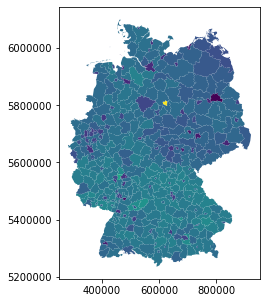

In [8]:
#check map
data_merg.plot(column='PKW-Dichte',figsize=(5,5))

In [386]:
### add inkar data

In [9]:
inkar_data=pd.read_csv(r"input\inkar.csv", sep=';', decimal=",")[1:]

inkar_data.Kennziffer=inkar_data.Kennziffer.astype(int).astype(str)
inkar_data.Kennziffer=('0' + inkar_data.Kennziffer).str[-5:]#.str 

inkar_data.Medianeinkommen=inkar_data.Medianeinkommen.str.replace('.','').astype(int)
inkar_data.Einwohnerdichte=inkar_data.Einwohnerdichte.str.replace('.','').astype(int)
inkar_data['Pkw-Dichte']=inkar_data['Pkw-Dichte'].astype(str).str.replace('.','').astype(int)

inkar_data.head()

Kennziffer        Raumeinheit      Aggregat  Medianeinkommen  \
1      01001   Flensburg, Stadt  krsfr. Stadt             2986   
2      01002        Kiel, Stadt  krsfr. Stadt             3304   
3      01003      Lübeck, Stadt  krsfr. Stadt             3036   
4      01004  Neumünster, Stadt  krsfr. Stadt             2842   
5      01051       Dithmarschen     Landkreis             2914   

   Einwohnerdichte  Ländlichkeit  Pkw-Dichte  \
1             1560             0         478   
2             2090             0         436   
3             1010             0         444   
4             1108             0         514   
5               93            74         583   

   Pendler mit Arbeitsweg 50 km und mehr  Auspendler  
1                                   14.0        34.2  
2                                   13.1        30.3  
3                                   15.0        31.3  
4                                   14.7        38.6  
5                                   16.7        73.5

In [10]:
merge=pd.merge(data_merg,inkar_data[['Kennziffer','Medianeinkommen','Einwohnerdichte', 'Ländlichkeit', 'Pkw-Dichte','Pendler mit Arbeitsweg 50 km und mehr', 'Auspendler']], left_on='RS', right_on='Kennziffer', how='left')
merge = merge.to_crs({'init': 'epsg:4326'})

merge.head()

C:\Users\Simon\Anaconda3\envs\geo_julab\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


RS                                           geometry          NAME  \
0  01001  POLYGON ((9.45309 54.75212, 9.37901 54.75320, ...     Flensburg   
1  01002  POLYGON ((10.18137 54.25242, 10.12343 54.25551...          Kiel   
2  01003  POLYGON ((10.63918 53.76811, 10.58630 53.78964...        Lübeck   
3  01004  POLYGON ((9.94436 54.02176, 9.95706 54.04909, ...    Neumünster   
4  01051  MULTIPOLYGON (((9.19843 53.88943, 9.02944 53.9...  Dithmarschen   

   PKW-Dichte Kennziffer  Medianeinkommen  Einwohnerdichte  Ländlichkeit  \
0         495      01001             2986             1560             0   
1         444      01002             3304             2090             0   
2         455      01003             3036             1010             0   
3         529      01004             2842             1108             0   
4         605      01051             2914               93            74   

   Pkw-Dichte  Pendler mit Arbeitsweg 50 km und mehr  Auspendler  
0         478                                   14.0        34.2  
1         436                                   13.1        30.3  
2         444                                   15.0        31.3  
3         514                                   14.7        38.6  
4         583                                   16.7        73.5

In [11]:
#merge.geometry=merge.buffer(0)

In [14]:
merge['bland']=merge.RS.str[:2]

In [17]:

#source=df[:500].copy()
source=merge


###################################
#### PREP ###

columns =['PKW-Dichte']
select_box = alt.binding_select(options=columns,  name='Kraftstoffart auswählen:  ')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'PKW-Dichte'}, 
                           clear=False,
                           on="click[event.shiftKey&!event.shiftKey]")

brush = alt.selection(type='interval')
opacity_map = alt.condition(brush, alt.value(1), alt.value(0.25))

opacity_chart = alt.condition(brush, alt.value(0.9), alt.value(0.2))

###################################
#### MAP ###

base = alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_geoshape(
    stroke='white',
    strokeWidth=0.5
).encode(
    opacity=opacity_map,
    color =  alt.Color('value:Q',
                        legend=alt.Legend(title="PKW-Dichte",orient='none',legendY=550,legendX=-50),
                       scale=alt.Scale(scheme='blues')),#  format='.1%'),
    tooltip=[
            alt.Tooltip('NAME', title='Zulassungsbezirk'),
            alt.Tooltip('RS', title='RS'),
            alt.Tooltip('PKW-Dichte')
        ],
).add_selection(
    sel
).properties(
    height=700,
    width=500
)

###################################
#### CHARTS ###

#### COL1 ###

chrt1=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_circle(size=60, opacity=0.6).encode(
    #x='bland:O',
    x=alt.Y('bland:O', 
            axis=alt.Axis(title='Bundesland')),
    y=alt.Y('value:Q', 
            axis=alt.Axis(format='%',title='Anteil')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('value:Q'),
                    alt.value('lightgray')),
    tooltip=['NAME:O','RS','value:Q']
).add_selection(
    sel
).add_selection(
    brush
).properties(
    height=300,
    width=300
)

chrt1b=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_boxplot(opacity=0.7).encode(
    x='bland:O',
      y=alt.Y('value:Q', title='')
).properties(
    height=300,
    width=300
)


chrt2=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('Einwohnerdichte:Q', title='Einwohnerdichte [E/qm]',scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('value:Q', 
            axis=alt.Axis(format='%',title='Anteil')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('value:Q'),
                    alt.value('lightgray')),
    tooltip=['NAME:O','RS','value:Q']
).add_selection(
    sel
).add_selection(
    brush
).properties(
    height=300,
    width=300
)

###################################
#### COL2 ###

chrt3=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_circle(size=60).encode(
    #x='_mean:Q',
    x=alt.X('Medianeinkommen:Q', title='Medianeinkommen [pro Monat]',scale=alt.Scale(type='log')),    #opacity=opacity_map,
    y=alt.Y('value:Q', 
            axis=alt.Axis(format='%',title='Anteil')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('value:Q'),
                    alt.value('lightgray')),
    tooltip=['NAME:O','RS','value:Q']
).add_selection(
    sel
).add_selection(
    brush
).properties(
    height=300,
    width=300
)


chrt4=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_circle(size=60).encode(
    x=alt.X('Ländlichkeit:Q', title='Ländlichkeit [% Einwohner in geringer Dichte]'),    #opacity=opacity_map,
    y=alt.Y('value:Q', 
            axis=alt.Axis(format='%',title='Anteil')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('value:Q'),
                    alt.value('lightgray')),
    tooltip=['NAME:O','RS','value:Q']
).add_selection(
    sel
).add_selection(
    brush
).properties(
    height=300,
    width=300
)

###################################
#### COL3 ###


chrt5=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_circle(size=60).encode(
    x=alt.X('Pkw-Dichte:Q', title='Pkw-Dichte'), 
    y=alt.Y('value:Q', 
            axis=alt.Axis(format='%',title='Anteil')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('value:Q'),
                    alt.value('lightgray')),
    tooltip=['NAME:O','RS','value:Q']
).add_selection(
    sel
).add_selection(
    brush
).properties(
    height=300,
    width=300
)

chrt6=alt.Chart(source).transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_circle(size=60).encode(
    x=alt.X('Auspendler:Q', title='Auspendler'),    
    y=alt.Y('value:Q', 
            axis=alt.Axis(format='%',title='Anteil')),
    opacity=opacity_chart,
    color=alt.condition(brush,
                    alt.Color('value:Q'),
                    alt.value('lightgray')),
    tooltip=['NAME:O','RS','value:Q']
).add_selection(
    sel
).add_selection(
    brush
).properties(
    height=300,
    width=300
)


chart = base | ((chrt1b+chrt1) & chrt2) |chrt3 & chrt4 |chrt5 & chrt6

##############################################################
# adding Titel and Subtitle
title = alt.Chart(
    {"values": [{"text": "Kraftstoffarten von PKW je Zulassungsbezirk"}]}
).mark_text(size=20, align='left').encode(  #,anchor='start' , align='left'
    text="text:N",
    x=alt.value(0)
)

subtitle = alt.Chart(
    {"values": [{"text": 'Quelle: KBA, INKAR'}]}
).mark_text(size=11, align='left').encode(
    text="text:N",
    x=alt.value(0)
)

  
fullchart_title= alt.vconcat(
    title,
    subtitle,#
    chart
).configure_view(
    stroke=None
).configure_concat(
    spacing=15
)

#fullchart_title.save('full_chart2.html')

In [18]:
fullchart_title

alt.VConcatChart(...)